<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [61]:
#Your Solution here
import pandas as pd
import sqlite3
connection = sqlite3.connect(r'data\chinook.db') #r  raw string: means it treats special characters (such as the backslash, \)
cursor = connection.cursor()
query = """
SELECT 
avg(t.Milliseconds) as avg,
t.name as Track,
t.Milliseconds,
g.name as Genre
FROM tracks t
JOIN genres g ON t.genreid = g.genreid
group by genre
order by avg desc;
"""
sql_df = pd.read_sql_query(query, connection)
#cursor.execute(query)
#cursor.fetchall()
print(sql_df['Genre'][0])

Sci Fi & Fantasy


In [62]:
sql_df

,avg,Track,Milliseconds,Genre
0,2.911783e+06,"Crossroads, Pt. 1",2622622,Sci Fi & Fantasy
1,2.625549e+06,Battlestar Galactica: The Story So Far,2622250,Science Fiction
2,2.575284e+06,Don't Look Back,2571154,Drama
3,2.145041e+06,Occupation / Precipice,5286953,TV Shows
4,1.585264e+06,The Convict,1273064,Comedy
5,3.097494e+05,Enter Sandman,221701,Metal
6,3.029858e+05,Just Another Story,529684,Electronica/Dance
7,2.974529e+05,Wildest Dreams,232777,Heavy Metal
8,2.938676e+05,"Symphony No. 3 in E-flat major, Op. 55, ""Eroic...",356426,Classical
9,2.917554e+05,Desafinado,185338,Jazz


## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [94]:
#Your Solution here

import sqlite3
import matplotlib.pyplot as plt
connection = sqlite3.connect('data\chinook.db')
cursor = connection.cursor()

query = """SELECT tracks.name as Track,
tracks.composer,
tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""

In [95]:
import pandas as pd
sql_df = pd.read_sql_query(query, connection)
excel_df = pd.read_excel("data/chinook_data.xlsx")
csv_df = pd.read_csv("data/chinook_data.csv",sep=',', decimal='.') 

- EDA CSV

In [96]:
csv_df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [97]:
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [98]:
csv_df.tail()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
298,She Loves Me Not,Bill Gould/Mike Bordin/Mike Patton,209867,6887544,0.99,Alternative & Punk,Album Of The Year,Faith No More
299,Beth,"Peter Criss, Stan Penridge, Bob Ezrin",170187,5577807,0.99,Rock,Unplugged [Live],Kiss
300,Exploder,Audioslave/Chris Cornell,206053,4948095,0.99,Rock,Audioslave,Audioslave
301,Os Cegos Do Castelo,Titãs,296829,9868187,0.99,Alternative & Punk,Acústico,Titãs
302,The Star Spangled Banner,"Hendrix, Jimi",43232,1385810,0.99,Rock,Rattle And Hum,U2


In [99]:
csv_df.shape

(303, 8)

In [100]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         303 non-null    object 
 1   Composer      227 non-null    object 
 2   Milliseconds  303 non-null    int64  
 3   Bytes         303 non-null    int64  
 4   UnitPrice     303 non-null    float64
 5   Genre         303 non-null    object 
 6   Album         303 non-null    object 
 7   Artist        303 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 19.1+ KB


In [101]:
csv_df.isna().sum()

Track            0
Composer        76
Milliseconds     0
Bytes            0
UnitPrice        0
Genre            0
Album            0
Artist           0
dtype: int64

In [102]:
csv_df.describe()

,Milliseconds,Bytes,UnitPrice
count,3.030000e+02,3.030000e+02,303.000000
mean,3.527488e+05,2.323252e+07,1.032904
std,4.422612e+05,7.494537e+07,0.202977
min,6.373000e+03,2.119970e+05,0.990000
25%,2.037680e+05,6.417540e+06,0.990000
50%,2.524210e+05,7.971384e+06,0.990000
75%,3.229640e+05,1.002353e+07,0.990000
max,2.935894e+06,5.517600e+08,1.990000


In [103]:
csv_df['Genre'].value_counts()

Rock                  114
Latin                  51
Alternative & Punk     40
Metal                  28
Jazz                   21
TV Shows                6
R&B/Soul                5
Classical               5
Hip Hop/Rap             4
Blues                   3
Soundtrack              3
Pop                     3
Reggae                  3
Comedy                  3
Alternative             2
World                   2
Bossa Nova              2
Drama                   2
Sci Fi & Fantasy        2
Heavy Metal             2
Easy Listening          1
Electronica/Dance       1
Name: Genre, dtype: int64

In [104]:
csv_df.corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.922748,0.933627
Bytes,0.922748,1.000000,0.934024
UnitPrice,0.933627,0.934024,1.000000


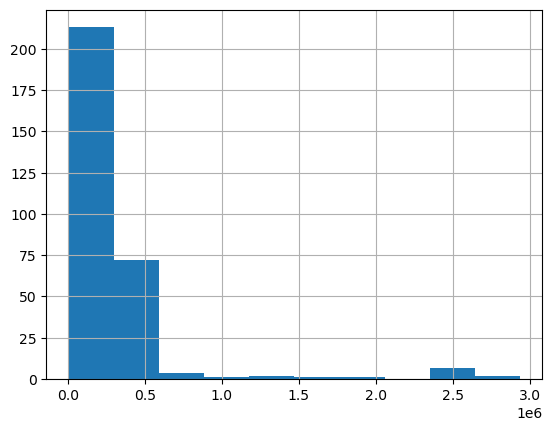

In [105]:
csv_df['Milliseconds'].hist()
plt.show()

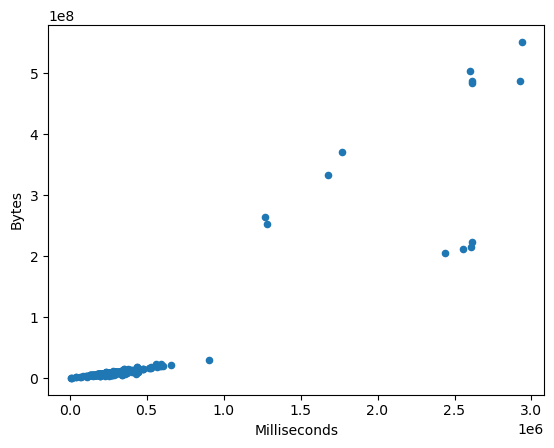

In [106]:
csv_df.plot.scatter(x='Milliseconds', 
y='Bytes')
plt.show()

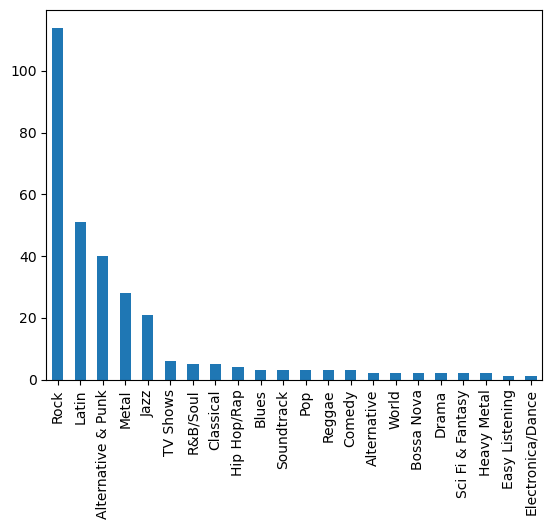

In [107]:
csv_df['Genre'].value_counts().plot.bar()
plt.show()

- EDA excel

In [108]:
excel_df.shape

(215, 8)

In [109]:
excel_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


In [110]:
excel_df.isna().sum()

Track            0
Composer        59
Milliseconds     0
Bytes            0
UnitPrice        0
Genre            0
Album            0
Artist           0
dtype: int64

In [111]:
excel_df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [112]:
excel_df['Genre'].value_counts()

Rock                  87
Latin                 26
Alternative & Punk    21
Metal                 18
Jazz                   9
Blues                  8
TV Shows               6
Classical              6
Drama                  5
Soundtrack             4
Electronica/Dance      4
Sci Fi & Fantasy       3
Alternative            3
R&B/Soul               3
Easy Listening         3
Reggae                 3
World                  2
Science Fiction        2
Hip Hop/Rap            1
Heavy Metal            1
Name: Genre, dtype: int64

In [113]:
excel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         215 non-null    object 
 1   Composer      156 non-null    object 
 2   Milliseconds  215 non-null    int64  
 3   Bytes         215 non-null    int64  
 4   UnitPrice     215 non-null    float64
 5   Genre         215 non-null    object 
 6   Album         215 non-null    object 
 7   Artist        215 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 13.6+ KB


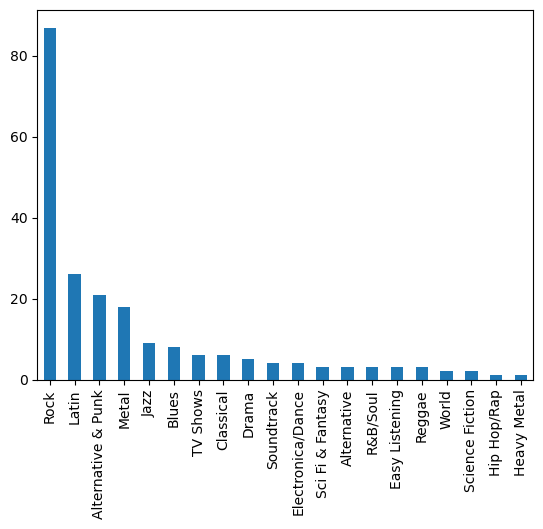

In [114]:
excel_df['Genre'].value_counts().plot.bar()
plt.show()

- EDA DATABASE

In [115]:
sql_df.head()

,Track,Composer,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [116]:
sql_df.shape

(3503, 6)

In [117]:
sql_df.isna().sum()

Track          0
Composer     978
UnitPrice      0
Genre          0
Album          0
Artist         0
dtype: int64

In [118]:
sql_df.describe()

,UnitPrice
count,3503.000000
mean,1.050805
std,0.239006
min,0.990000
25%,0.990000
50%,0.990000
75%,0.990000
max,1.990000


In [88]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Track      3503 non-null   object 
 1   Composer   2525 non-null   object 
 2   UnitPrice  3503 non-null   float64
 3   Genre      3503 non-null   object 
 4   Album      3503 non-null   object 
 5   Artist     3503 non-null   object 
dtypes: float64(1), object(5)
memory usage: 164.3+ KB


## - DATA CLEANING

#### Remowing irrelevant data

We may not really interested of the ‘Composer’ column, since it contains a lot of nan values

In [89]:
sql_df.drop('Composer', axis=1, inplace=True)
sql_df.columns

Index(['Track', 'UnitPrice', 'Genre', 'Album', 'Artist'], dtype='object')

In [90]:
csv_df.drop('Composer', axis=1, inplace=True)
csv_df.columns

Index(['Track', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre', 'Album',
       'Artist'],
      dtype='object')

In [91]:
excel_df.drop('Composer', axis=1, inplace=True)
excel_df.columns

Index(['Track', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre', 'Album',
       'Artist'],
      dtype='object')

#### Dealing with missing values

In [119]:
sql_df['Composer'].fillna('Unknown', inplace=True)
csv_df['Composer'].fillna('Unknown', inplace=True)
excel_df['Composer'].fillna('Unknown', inplace=True)


In [120]:
sql_df['UnitPrice'].fillna(sql_df['UnitPrice'].mode(),inplace=True)
csv_df['UnitPrice'].fillna(csv_df['UnitPrice'].mode(),inplace=True)
excel_df['UnitPrice'].fillna(excel_df['UnitPrice'].mode(),inplace=True)

In [144]:
itunes['Composer'].fillna('Unknown', inplace=True)
itunes['UnitPrice'].fillna(itunes['UnitPrice'].mode(),inplace=True)

In [145]:
itunes = remove_outliers(itunes, "Milliseconds")

In [128]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df
sql_df = remove_outliers(sql_df, "UnitPrice")

,Track,Composer,UnitPrice,Genre,Album,Artist


In [142]:
itunes =pd.concat([csv_df, excel_df, sql_df])

In [136]:
sql_df.to_excel("output_sql.xlsx")
excel_df.to_excel("output_excel.xlsx")


In [146]:
itunes.to_excel("itunes.xlsx")

##### Using SIMPLEIMPUTER

- You can use Sklearn.impute class SimpleImputer to impute/replace missing values for both numerical and categorical features.
- For numerical missing values, a strategy such as mean, median, most frequent, and constant can be used.
- For categorical features, a strategy such as the most frequent and constant can be used.

In [122]:
from sklearn.impute import SimpleImputer
import numpy as np
# Imputing with mean value
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
# Imputing with median value
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
# Imputing with most frequent / mode value
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
#
# Imputing with constant value; The command below replaces the missing
# value with constant value such as 80
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=80)

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-11-28` to `2022-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [34]:
#Your Solution
import json
with open('data/bitcoin_price.json') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
print(btc_df_jsn)

      symbol           time          open         close         high  \
0     btcusd  1364688000000     92.500000     93.033000     93.74999   
1     btcusd  1364774400000     93.250000    103.999000    105.90000   
2     btcusd  1364860800000    104.000000    118.229354    118.38670   
3     btcusd  1364947200000    117.958261    134.700000    146.88000   
4     btcusd  1365033600000    134.716560    132.899000    143.00000   
...      ...            ...           ...           ...          ...   
2788  btcusd  1606176000000  18364.000000  19131.000000  19400.00000   
2789  btcusd  1606262400000  19133.654712  18727.000000  19497.00000   
2790  btcusd  1606348800000  18726.475677  17211.695801  18908.00000   
2791  btcusd  1606435200000  17213.000000  17171.000000  17531.00000   
2792  btcusd  1606521600000  17171.000000  17686.840768  17705.00000   

              low        volume  
0        91.00000   3083.079791  
1        92.49999   5224.401313  
2        99.00000   8376.527478  

In [36]:
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='2020-11-28', # The starting date
                   end='2022-10-31', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )

[*********************100%***********************]  1 of 1 completed


In [37]:
print(btc_yf_df)

                    Open          High           Low         Close  \
Date                                                                 
2020-11-28  17112.933594  17853.939453  16910.652344  17717.414062   
2020-11-29  17719.634766  18283.628906  17559.117188  18177.484375   
2020-11-30  18178.322266  19749.263672  18178.322266  19625.835938   
2020-12-01  19633.769531  19845.974609  18321.921875  18802.998047   
2020-12-02  18801.744141  19308.330078  18347.718750  19201.091797   
...                  ...           ...           ...           ...   
2022-10-26  20092.236328  20938.134766  20076.117188  20770.441406   
2022-10-27  20772.802734  20854.044922  20255.373047  20285.835938   
2022-10-28  20287.957031  20724.980469  20086.068359  20595.351562   
2022-10-29  20595.103516  20988.394531  20566.484375  20818.476562   
2022-10-30  20817.982422  20917.005859  20547.462891  20635.603516   

               Adj Close       Volume  
Date                                   
2020-11-2

In [38]:
btc_df_jsn.rename(columns ={'time':'date'}, inplace = True)

In [39]:
btc_df_jsn

,symbol,date,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...,...
2788,btcusd,1606176000000,18364.000000,19131.000000,19400.00000,18130.00000,14937.354569
2789,btcusd,1606262400000,19133.654712,18727.000000,19497.00000,18500.00000,13477.604832
2790,btcusd,1606348800000,18726.475677,17211.695801,18908.00000,16317.00000,34343.561464
2791,btcusd,1606435200000,17213.000000,17171.000000,17531.00000,16501.00000,11217.912098


In [178]:
btc_df_jsn['date'] = pd.to_datetime(btc_df_jsn['date'], unit='ms')

KeyError: 'date'

In [179]:
btc_df_jsn

,symbol,open,close,high,low,volume
date,,,,,,
2013-03-31,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
2013-04-01,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
2013-04-02,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
2013-04-03,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
2013-04-04,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...
2020-11-24,btcusd,18364.000000,19131.000000,19400.00000,18130.00000,14937.354569
2020-11-25,btcusd,19133.654712,18727.000000,19497.00000,18500.00000,13477.604832
2020-11-26,btcusd,18726.475677,17211.695801,18908.00000,16317.00000,34343.561464


In [180]:
btc_df_jsn.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [181]:
btc_df_jsn

,symbol,open,close,high,low,volume
date,,,,,,
2013-03-31,btcusd,92.500000,93.033000,93.74999,91.00000,3083.079791
2013-04-01,btcusd,93.250000,103.999000,105.90000,92.49999,5224.401313
2013-04-02,btcusd,104.000000,118.229354,118.38670,99.00000,8376.527478
2013-04-03,btcusd,117.958261,134.700000,146.88000,101.51088,12996.245072
2013-04-04,btcusd,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...
2020-11-24,btcusd,18364.000000,19131.000000,19400.00000,18130.00000,14937.354569
2020-11-25,btcusd,19133.654712,18727.000000,19497.00000,18500.00000,13477.604832
2020-11-26,btcusd,18726.475677,17211.695801,18908.00000,16317.00000,34343.561464


In [182]:
btc_df_jsn.columns= btc_df_jsn.columns.str.lower()

In [183]:
btc_yf_df.columns= btc_yf_df.columns.str.lower()

In [184]:
type(btc_yf_df)

pandas.core.frame.DataFrame

In [185]:
type(btc_df_jsn)

pandas.core.frame.DataFrame

In [186]:
conc_btc= pd.concat([btc_df_jsn,btc_yf_df])

In [187]:
conc_btc

,symbol,open,close,high,low,volume,adj close
2013-03-31,btcusd,92.500000,93.033000,93.749990,91.000000,3.083080e+03,NaN
2013-04-01,btcusd,93.250000,103.999000,105.900000,92.499990,5.224401e+03,NaN
2013-04-02,btcusd,104.000000,118.229354,118.386700,99.000000,8.376527e+03,NaN
2013-04-03,btcusd,117.958261,134.700000,146.880000,101.510880,1.299625e+04,NaN
2013-04-04,btcusd,134.716560,132.899000,143.000000,119.000000,6.981668e+03,NaN
...,...,...,...,...,...,...,...
2022-10-26,NaN,20092.236328,20770.441406,20938.134766,20076.117188,5.889595e+10,20770.441406
2022-10-27,NaN,20772.802734,20285.835938,20854.044922,20255.373047,4.962511e+10,20285.835938
2022-10-28,NaN,20287.957031,20595.351562,20724.980469,20086.068359,4.399472e+10,20595.351562
2022-10-29,NaN,20595.103516,20818.476562,20988.394531,20566.484375,4.036984e+10,20818.476562


<AxesSubplot:>

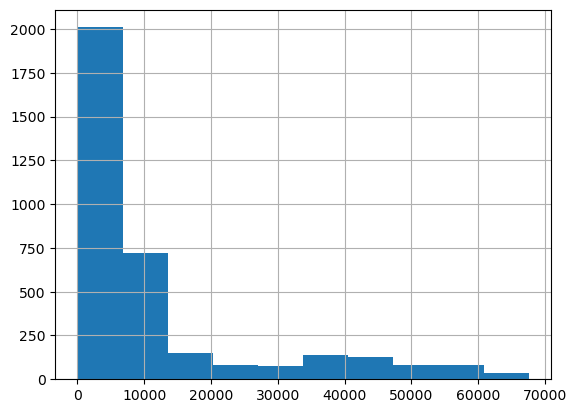

In [188]:
conc_btc['open'].hist()

<AxesSubplot:>

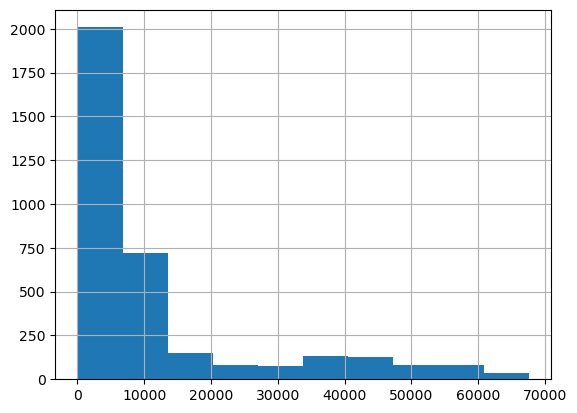

In [189]:
conc_btc['close'].hist()

In [196]:
conc_btc.isna().sum()

symbol    702
open        0
close       0
high        0
low         0
volume      0
dtype: int64

In [198]:
conc_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3495 entries, 2013-03-31 to 2022-10-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  3495 non-null   object 
 1   open    3495 non-null   float64
 2   close   3495 non-null   float64
 3   high    3495 non-null   float64
 4   low     3495 non-null   float64
 5   volume  3495 non-null   float64
dtypes: float64(5), object(1)
memory usage: 191.1+ KB


In [192]:
conc_btc.drop('adj close', axis=1, inplace=True)

In [197]:
conc_btc['symbol'].fillna("btcusd",inplace=True)

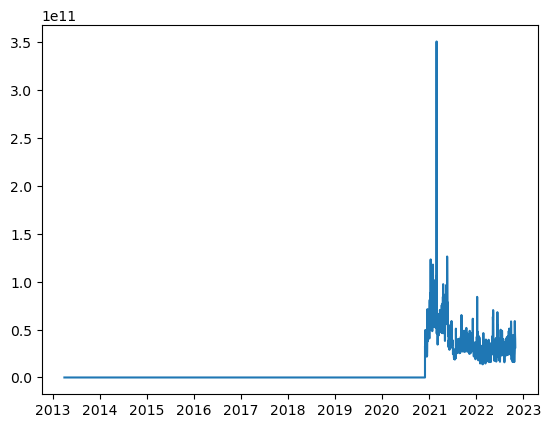

In [194]:
plt.plot(conc_btc.index, conc_btc['volume'])

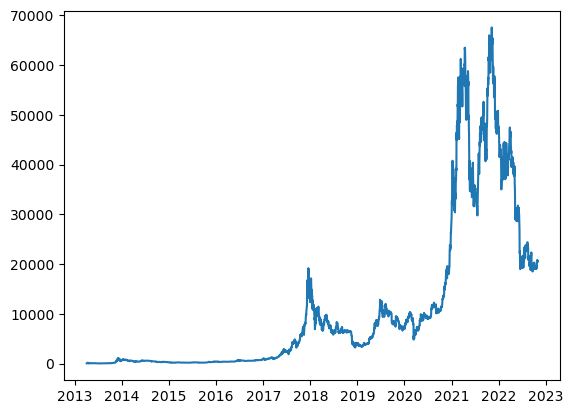

In [195]:
plt.plot(conc_btc.index, conc_btc['close'])